In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as md
import matplotlib.ticker as ticker
from scipy import stats
import numpy as np

In [2]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [3]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])

In [4]:
Dots['StartTime'] = Dots['time'].str[11:19]
Dots['StartTime'] = pd.to_datetime(Dots['StartTime'])
Dots['StartTime'] = Dots['StartTime'].apply(lambda x: x.time())

In [5]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [6]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [7]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [8]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [9]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

## Investigate the influences of Weather

1. Load csv data, interprete the data, 
Temperature/wind vs Walk/Bike: Daily



In [10]:
weather_dot=pd.read_csv('Wunderground_Weather_NumbersOnly - Sheet1.csv')
weather_dot=weather_dot[['Day','Time','Temperature_F', 'Wind_Speed_MPH','Wind_Gust_MPH']]


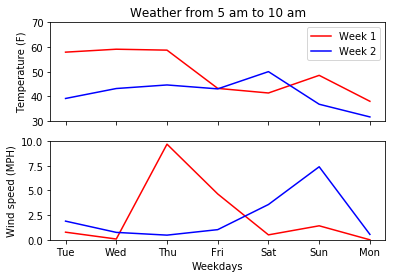

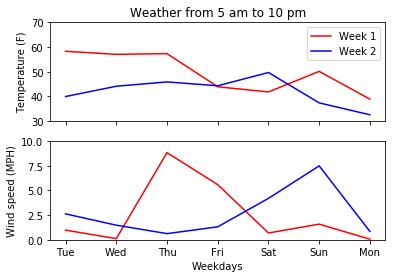

In [11]:
weather_dot['hour']=weather_dot.Time.apply(lambda x:int(x.split(":", 1)[0]))
weather_dot['is_morning']=weather_dot['hour'].apply(lambda x: x<=10 and x>=5)
weater_dot_morning=weather_dot[weather_dot['is_morning']==True]
weater_dot_morning=weater_dot_morning[["Day","Temperature_F","Wind_Speed_MPH",'Wind_Gust_MPH']]
weater_dot_morning_ave=weater_dot_morning.groupby('Day').mean()
x=['Tue','Wed','Thu','Fri','Sat','Sun','Mon']
y1_temp=weater_dot_morning_ave['Temperature_F'].values[0:7]
y2_temp=weater_dot_morning_ave['Temperature_F'].values[7:]
y1_wind=weater_dot_morning_ave['Wind_Speed_MPH'].values[0:7]
y2_wind=weater_dot_morning_ave['Wind_Speed_MPH'].values[7:]

fig = plt.figure()
ax = plt.subplot(211)
ax.plot(x, y1_temp, label='Week 1',color='r')
ax.plot(x, y2_temp, label='Week 2',color='b')
ax.legend()
#plt.xlabel('Weekdays')
plt.ylabel('Temperature (F)')
plt.title('Weather from 5 am to 10 am', color = "k")
plt.tick_params(labelbottom=False)
ax.set_ylim([30,70])

ax = plt.subplot(212)
ax.plot(x, y1_wind, label='Week 1',color='r')
ax.plot(x, y2_wind, label='Week 2',color='b')
#ax.legend()
plt.xlabel('Weekdays')
plt.ylabel('Wind speed (MPH)')
#plt.title('Wind in Morning', color = "k")
ax.set_ylim([0,10])
plt.show()

weather_dot['hour']=weather_dot.Time.apply(lambda x:int(x.split(":", 1)[0]))
weather_dot['is_day']=weather_dot['hour'].apply(lambda x: x<=22 and x>=5)
weater_dot_day=weather_dot[weather_dot['is_day']==True]
weater_dot_day=weater_dot_day[["Day","Temperature_F","Wind_Speed_MPH",'Wind_Gust_MPH']]
weater_dot_day_ave=weater_dot_day.groupby('Day').mean()
x=['Tue','Wed','Thu','Fri','Sat','Sun','Mon']
y1_temp=weater_dot_day_ave['Temperature_F'].values[0:7]
y2_temp=weater_dot_day_ave['Temperature_F'].values[7:]
y1_wind=weater_dot_day_ave['Wind_Speed_MPH'].values[0:7]
y2_wind=weater_dot_day_ave['Wind_Speed_MPH'].values[7:]

fig = plt.figure()
ax = plt.subplot(211)
ax.plot(x, y1_temp, label='Week 1',color='r')
ax.plot(x, y2_temp, label='Week 2',color='b')
ax.legend()
ax.set_ylim([30,70])
#plt.xlabel('Weekdays')
plt.ylabel('Temperature (F)')
plt.title('Weather from 5 am to 10 pm', color = "k")
plt.tick_params(labelbottom=False)

ax = plt.subplot(212)
ax.plot(x, y1_wind, label='Week 1',color='r')
ax.plot(x, y2_wind, label='Week 2',color='b')
#ax.legend()
plt.xlabel('Weekdays')
plt.ylabel('Wind speed (MPH)')
#plt.title('Wind in Morning', color = "k")
ax.set_ylim([0,10])
plt.show()

<b>Summary: </b> 
1. There is no rainy/snowy day between 10-29-2019 to 11-12-2019. Therefore, we mainly investigate the influences of wind and temperature on the traffic behaviors.
2. To eleminate the influences of course schedule and weekly events, we prefer to choose the data at same weekday.
3. Therefore, we choose Oct. 30 and Nov. 6 for temperature study, Oct.30 and Oct. 31 for wind study

In [12]:
weater_dot_day_ave

,Temperature_F,Wind_Speed_MPH,Wind_Gust_MPH
Day,,,
10/29/2019,58.297872,0.978723,0.000000
10/30/2019,57.060000,0.120000,0.000000
10/31/2019,57.346939,8.816327,10.755102
11/1/2019,43.937500,5.583333,6.500000
11/10/2019,41.833333,0.687500,0.000000
11/11/2019,50.166667,1.583333,0.000000
11/2/2019,38.916667,0.062500,0.000000
11/3/2019,39.979167,2.625000,2.354167
11/4/2019,44.145833,1.479167,1.062500


### Investigate the influence of temperature

### Merge sensor type

In [13]:
Dots_sensor_1=Dots[Dots['location_5']=='Campus Drive & Paint Branch Drive']
Dots_sensor_other=Dots[Dots['location_5']!='Campus Drive & Paint Branch Drive']
Dots_sensor_2=Dots[Dots['location_5']=='Stadium Drive & Regents Drive']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Stadium Drive & Regents Drive']
Dots_sensor_3=Dots[Dots['location_5']=='Baltimore Avenue & Regents Drive (South Gate)']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Baltimore Avenue & Regents Drive (South Gate)']

Dots_sensor_1=Dots_sensor_1.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_2=Dots_sensor_2.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_3=Dots_sensor_3.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_other=Dots_sensor_other.drop(columns=['location'])

for i in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots_sensor_2[i]=Dots_sensor_2[i]*2

Dots_mod=Dots_sensor_1.append([Dots_sensor_2,Dots_sensor_3,Dots_sensor_other],ignore_index=False)


D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


###  Cold/Hot Date 2019-10-30 and 2019-11-06 at different sensor locations

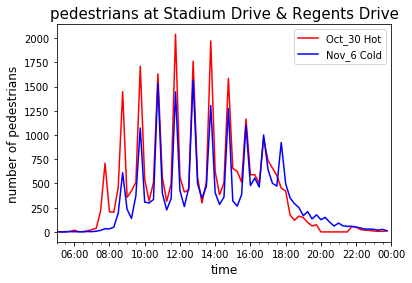

p = 0.2843955382414204


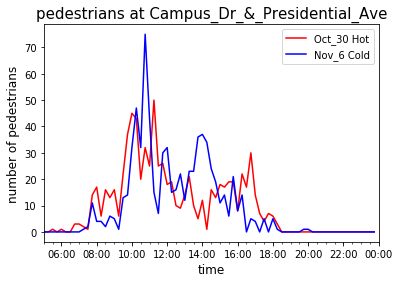

p = 0.8619998878104194


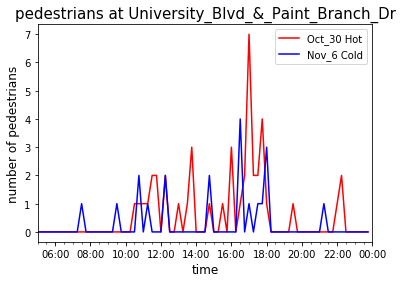

p = 0.05770533275335245


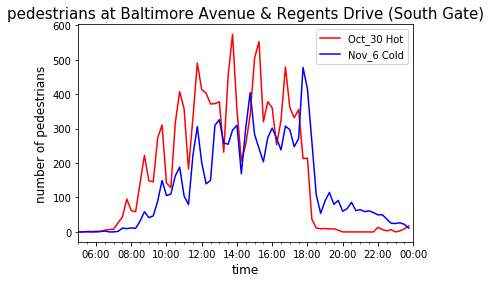

p = 0.16954632204426745


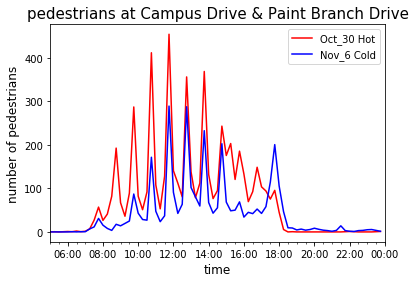

p = 0.02610375584769009


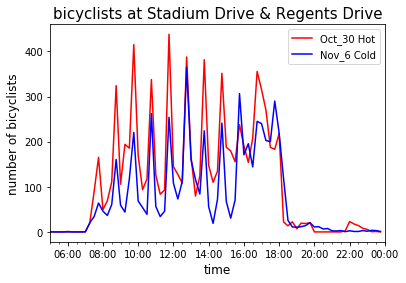

p = 0.08086438901681138


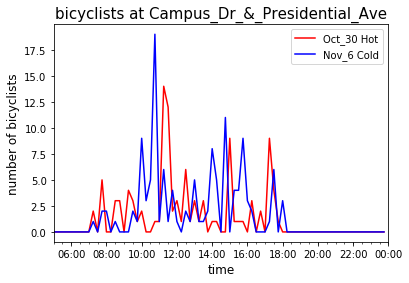

p = 0.5553220586823884


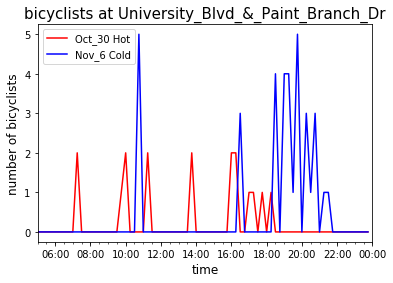

p = 0.25793641738575385


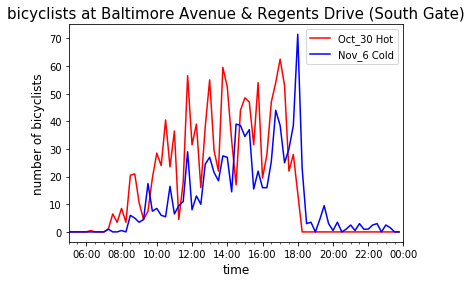

p = 0.08885077164885677


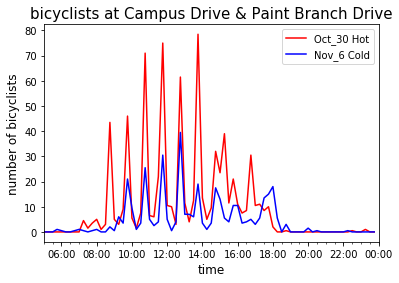

p = 0.019033652992889612


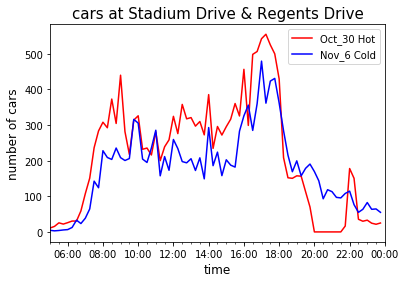

p = 0.1945759274664092


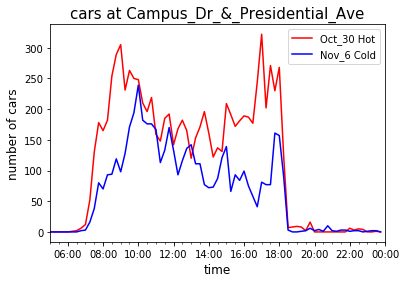

p = 0.002186206406515636


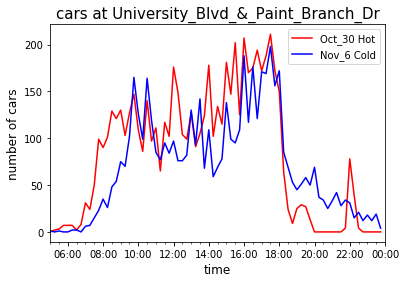

p = 0.3558400237814805


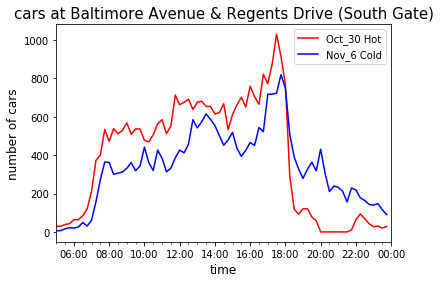

p = 0.34987372950326967


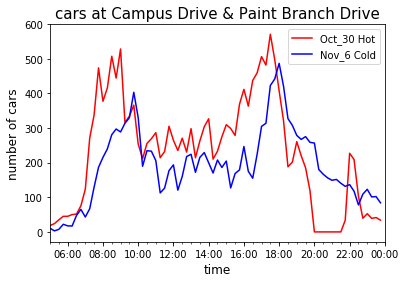

p = 0.16544172547565103


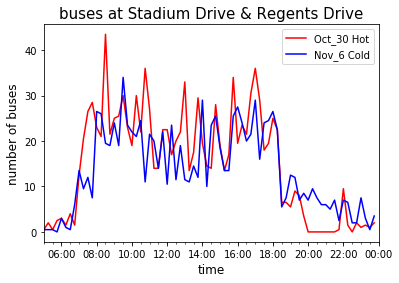

p = 0.5992753238681127


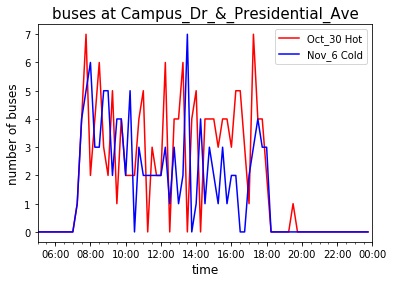

p = 0.19699709312853497


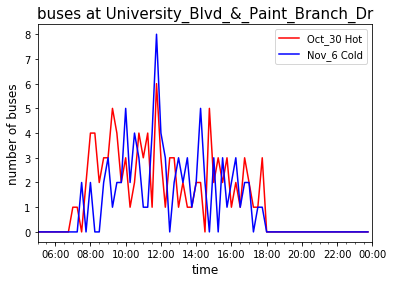

p = 0.46945917927933256


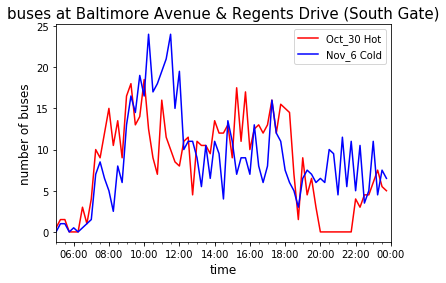

p = 0.40806258516769234


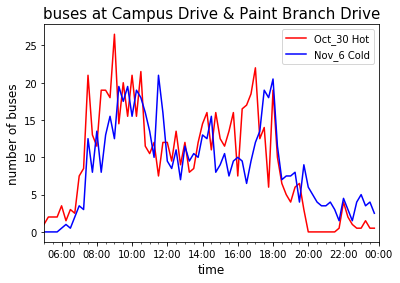

p = 0.816100292938709


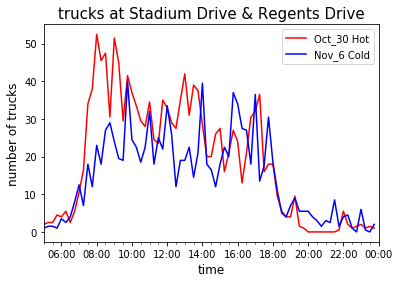

p = 0.08680267900664554


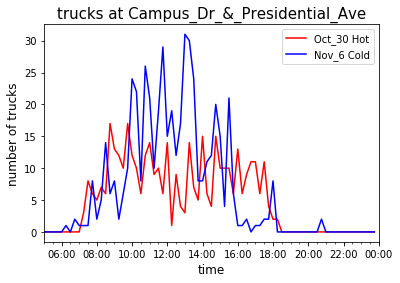

p = 0.26179249018638145


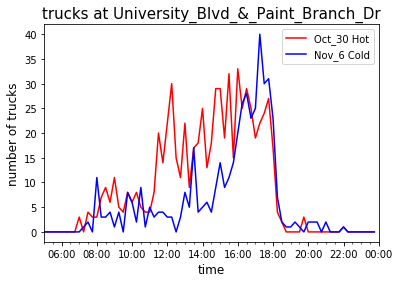

p = 0.0681640070046579


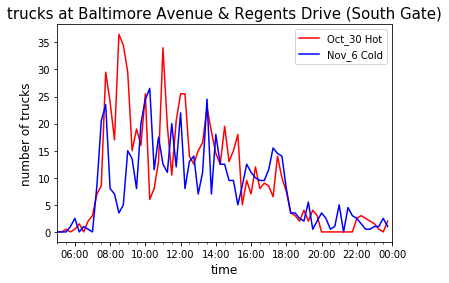

p = 0.3467873642382343


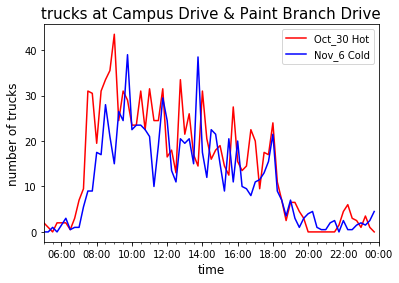

p = 0.15458798281334635


In [14]:
data_Nov_6=Dots_mod[Dots_mod['Date']=='2019-11-06']
data_Oct_30=Dots_mod[Dots_mod['Date']=='2019-10-30']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Oct_30[data_Oct_30['location_5']==locs]
        value2=data_Nov_6[data_Nov_6['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 Hot',color='r')
        ax.plot(x, y2, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim([start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=120))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('number of '+ types,fontsize =12)
        plt.title(types + ' at '+locs, color = "k",fontsize =15)
        plt.show()
        
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        t2, p2 = stats.ttest_ind(y1.values,y2.values)
        print("p = " + str(p2))

### Cold/Hot Date 2019-11-01 and 2019-11-08 at different sensor locations

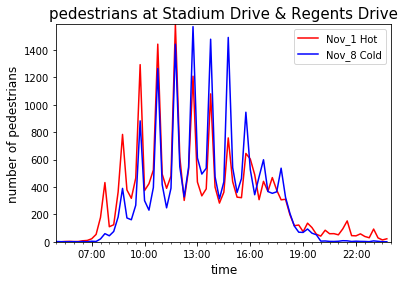

p = 0.801977891156116


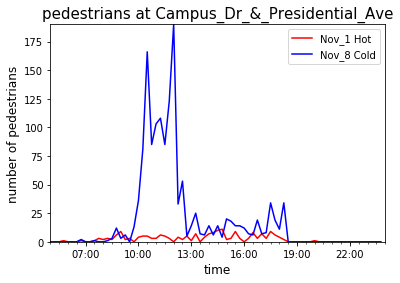

p = 1.9996573782077256


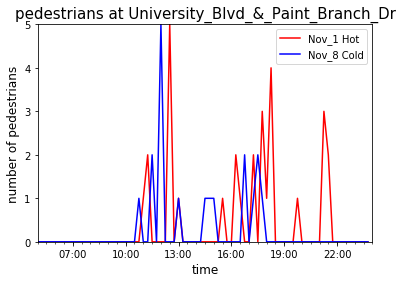

p = 0.30431627132480576


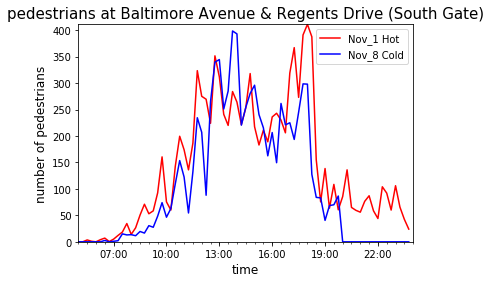

p = 0.11503869899825592


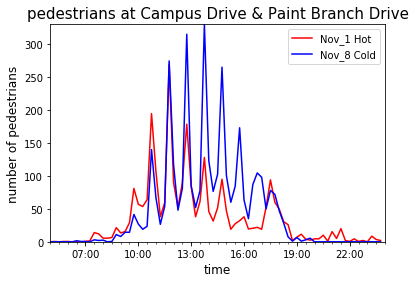

p = 1.721447338254538


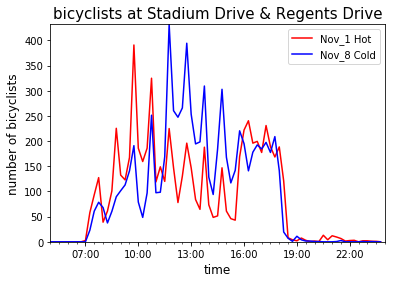

p = 1.4024421141861492


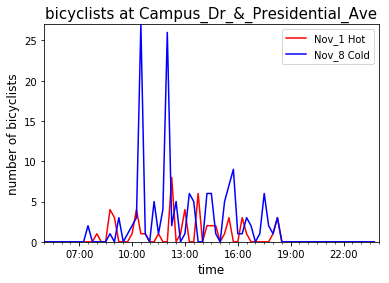

p = 1.974242702441812


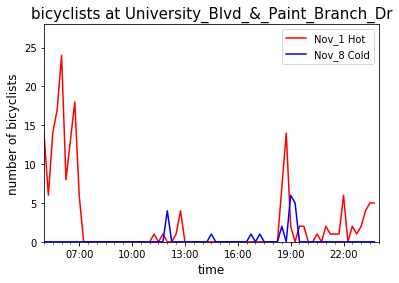

p = 0.06747838919460869


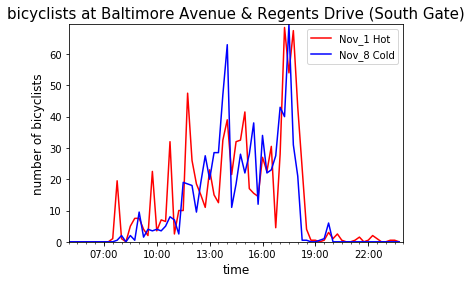

p = 0.5839166019740403


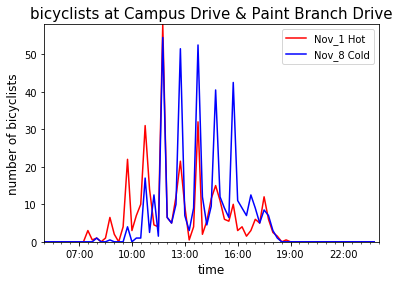

p = 1.526656787952618


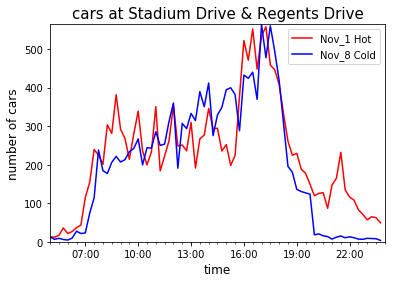

p = 0.4577595237807959


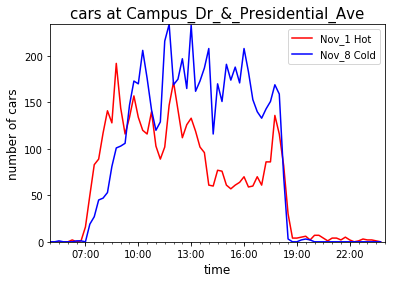

p = 1.9463846814795673


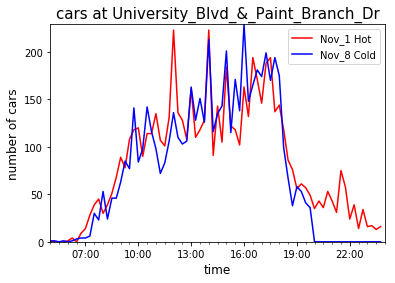

p = 0.5075679345867907


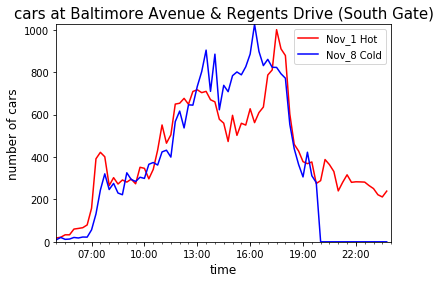

p = 0.5731732267240615


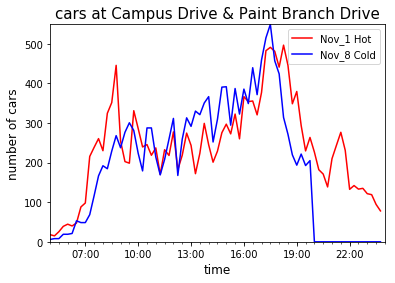

p = 0.21546055055361135


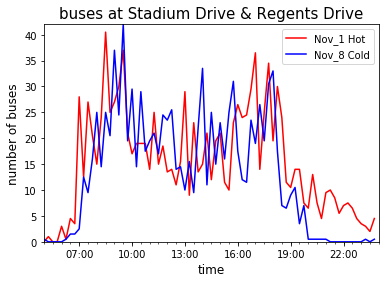

p = 0.298326389092882


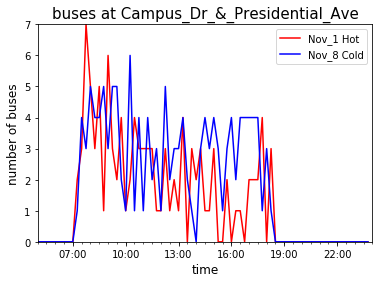

p = 1.8353366822961827


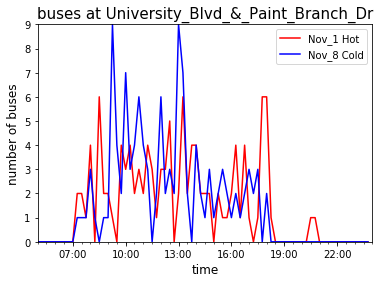

p = 1.1541259491299458


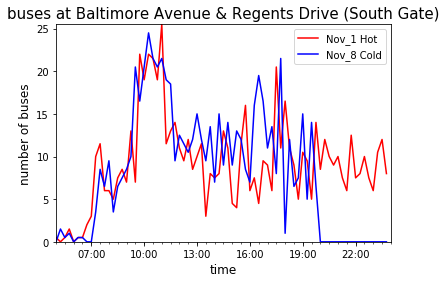

p = 0.893558928081575


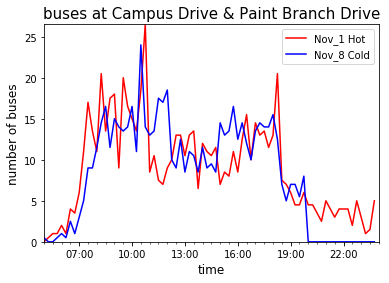

p = 0.6016026635282197


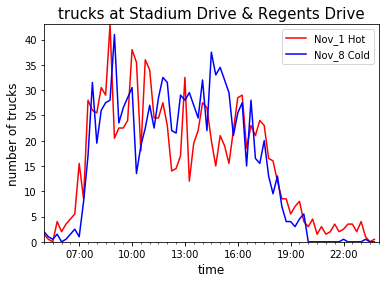

p = 0.9652356285005153


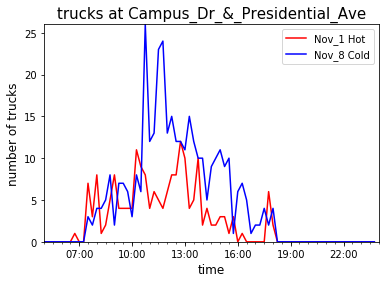

p = 1.9917233945043993


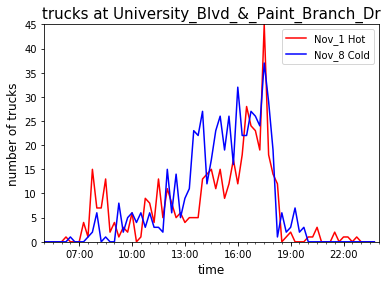

p = 1.6158961210230811


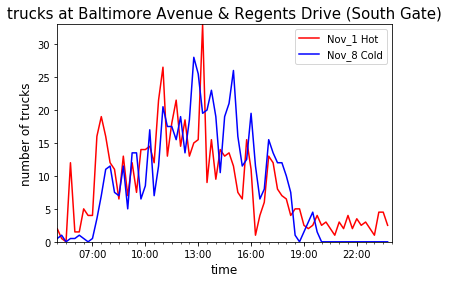

p = 0.9301298808065126


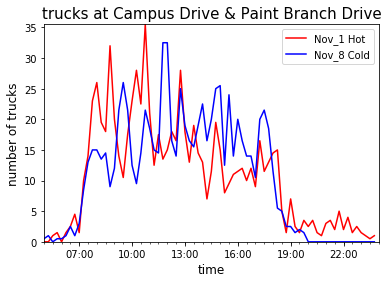

p = 1.0350324379019984


In [15]:
data_Nov_8=Dots_mod[Dots_mod['Date']=='2019-11-08']
data_Nov_1=Dots_mod[Dots_mod['Date']=='2019-11-01']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Nov_1[data_Nov_1['location_5']==locs]
        value2=data_Nov_8[data_Nov_8['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Nov_1 Hot',color='r')
        ax.plot(x, y2, label='Nov_8 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('number of '+ types,fontsize =12)
        plt.title(types + ' at '+locs, color = "k",fontsize =15)
        plt.margins(0)
        plt.show()
        
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))

### Wind Date 2019-10-30 and 2019-10-31

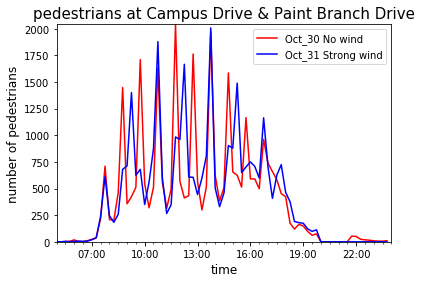

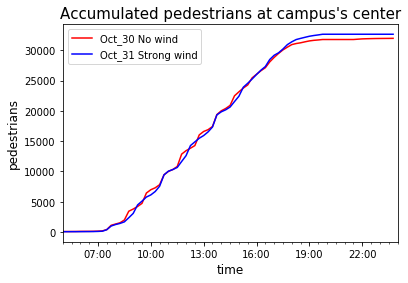

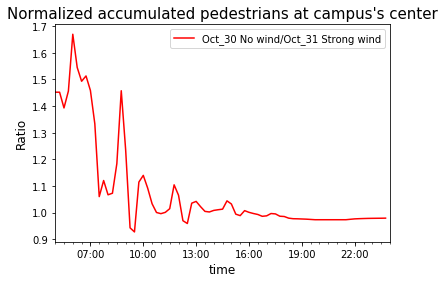

p = 1.0834592280122641


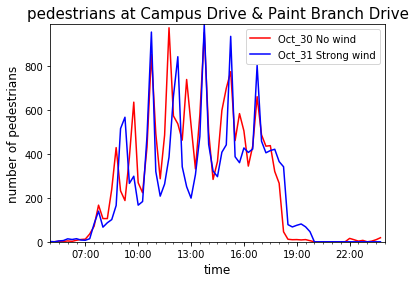

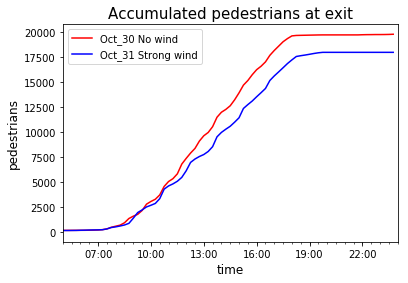

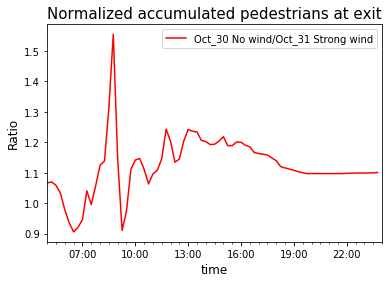

p = 0.6087706815334593


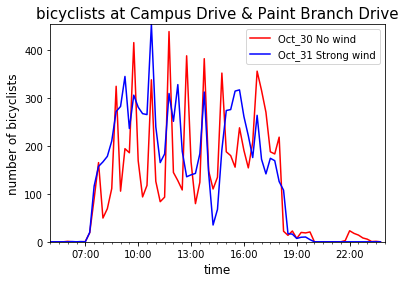

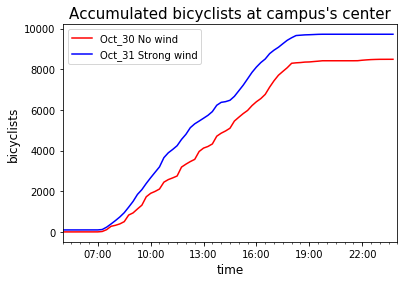

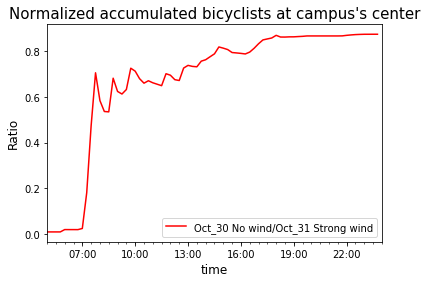

p = 1.5453792680939746


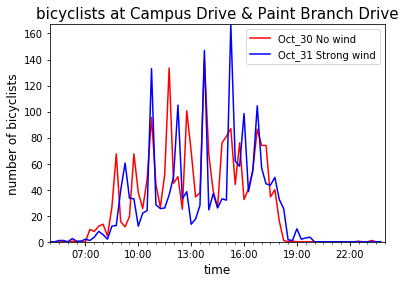

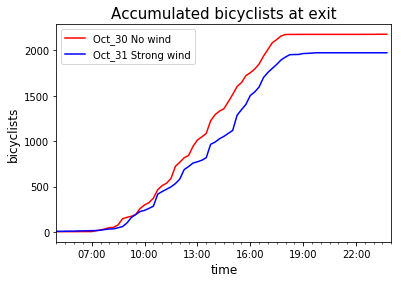

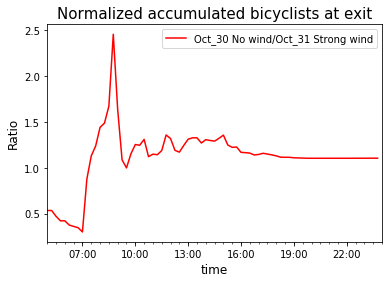

p = 0.6561350667193084


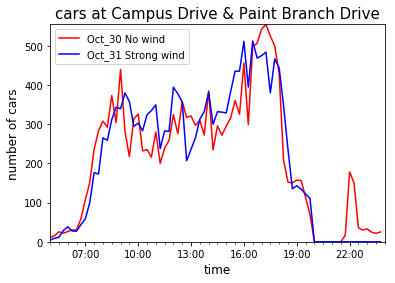

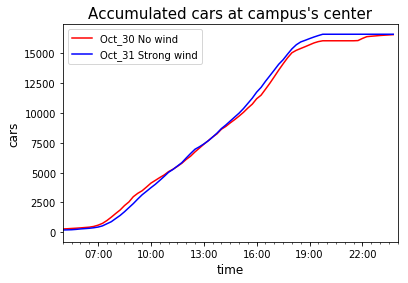

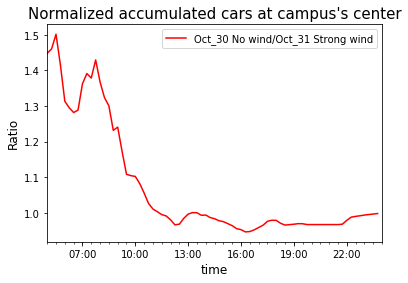

p = 1.0114442185009977


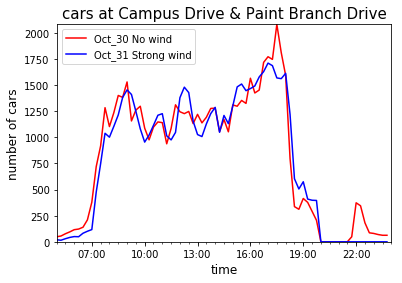

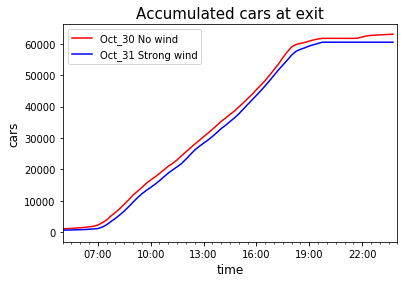

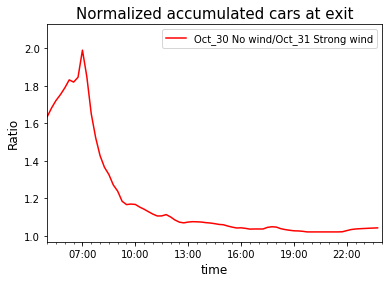

p = 0.7695154221054104


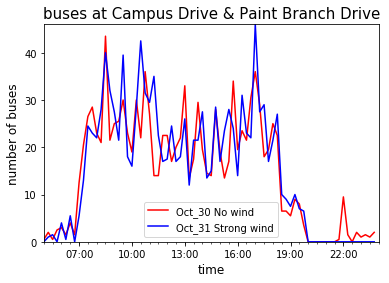

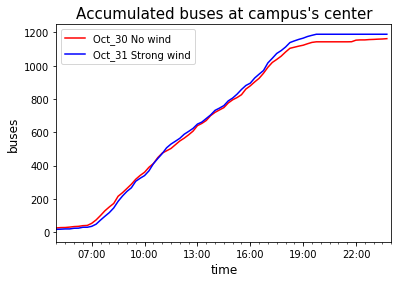

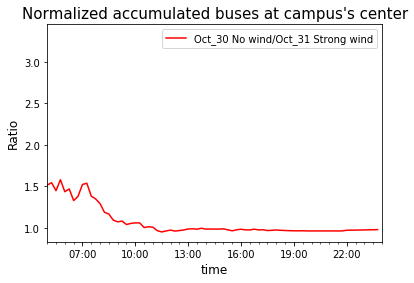

p = 1.1232238201694869


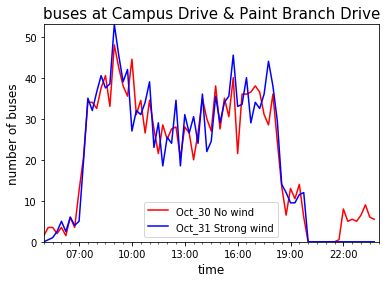

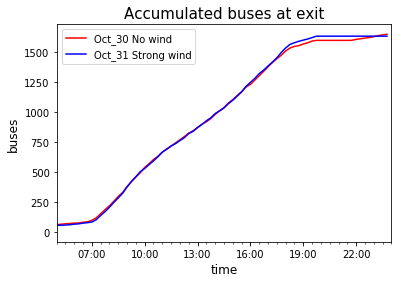

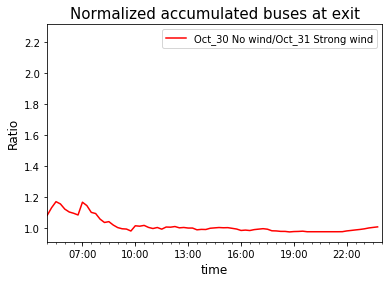

p = 0.9406014778923624


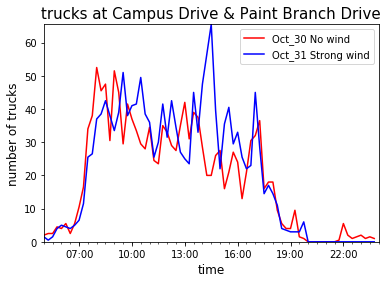

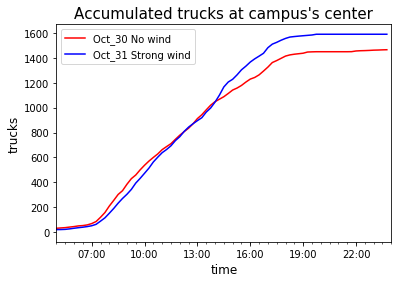

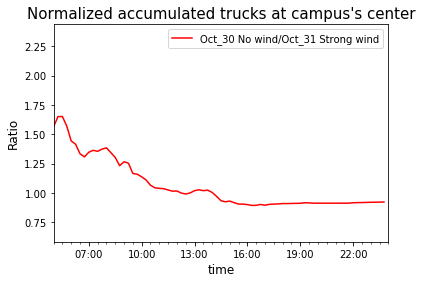

p = 1.4032718442988388


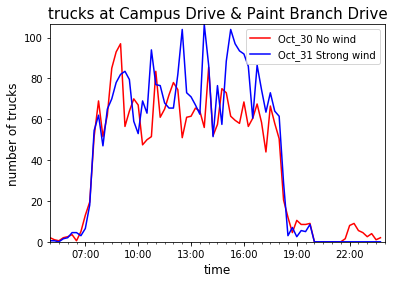

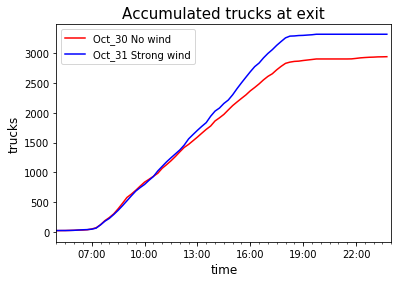

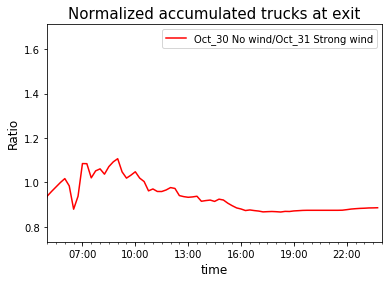

p = 1.5665366484943017


In [16]:
Dots_mod['in_campus']=Dots_mod['location_5'].apply(lambda x:x=='Stadium Drive & Regents Drive')
Dots_mod3=Dots_mod.drop(columns=['location_5'])
Dots_mod4=Dots_mod3.groupby(['time','in_campus','Date','StartTime'],as_index=False).sum()
data_Oct_31_4=Dots_mod4[Dots_mod4['Date']=='2019-10-31']
data_Oct_30_4=Dots_mod4[Dots_mod4['Date']=='2019-10-30']

#data_Nov_6_4['time']=data_Nov_6_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4['time']=data_Oct_30_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4=data_Oct_30_4.drop(columns=['StartTime'])
#data_Nov_6_4=data_Nov_6_4.drop(columns=['StartTime'])
#data_Oct_30_4=data_Oct_30_4.groupby(['time','in_campus','Date'],as_index=False).max()
#data_Nov_6_4=data_Nov_6_4.groupby(['time','in_campus','Date'],as_index=False).max()


for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for in_campus in [True, False]:
        if in_campus==True:
            loc="campus's center"
        else:
            loc='exit'
        
        value1=data_Oct_30_4[data_Oct_30_4['in_campus']==in_campus]
        value2=data_Oct_31_4[data_Oct_31_4['in_campus']==in_campus]
        x=value1.time
        y1=value1[types]
        y1_acc=np.cumsum(y1.values)
        y2=value2[types]
        y2_acc=np.cumsum(y2.values)
        
        
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 No wind',color='r')
        ax.plot(x, y2, label='Oct_31 Strong wind',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('number of '+ types,fontsize =12)
        plt.title(types + ' at '+locs, color = "k",fontsize =15)
        plt.margins(0)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc, label='Oct_30 No wind',color='r')
        ax.plot(x, y2_acc, label='Oct_31 Strong wind',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel(types,fontsize =12)
        plt.title('Accumulated '+ types + ' at '+loc, color = "k",fontsize =15)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc/y2_acc, label='Oct_30 No wind/Oct_31 Strong wind',color='r')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('Ratio',fontsize =12)
        plt.title('Normalized accumulated '+ types + ' at '+loc, color = "k",fontsize =15)
        plt.show()
        
        #calculate p-value
        #print(x.values[5])
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))
        

## Eliminate the influence of class schedule using average number per hour

In [17]:
data_Nov_6['hour']=data_Nov_6['StartTime'].apply(lambda x:x.hour)
data_Nov_6_2=data_Nov_6[data_Nov_6['hour']>=5]
data_Nov_6_2=data_Nov_6_2[data_Nov_6_2['hour']<=23]
data_Nov_6_2=data_Nov_6_2.drop(columns=['time','StartTime'])

data_Oct_30['hour']=data_Oct_30['StartTime'].apply(lambda x:x.hour)
data_Oct_30_2=data_Oct_30[data_Oct_30['hour']>=5]
data_Oct_30_2=data_Oct_30_2[data_Oct_30_2['hour']<=23]
data_Oct_30_2=data_Oct_30_2.drop(columns=['time','StartTime'])
data_Nov_6_3=data_Nov_6_2.groupby(['hour','location_5','Date'],as_index=False).mean()
data_Oct_30_3=data_Oct_30_2.groupby(['hour','location_5','Date'],as_index=False).mean()

D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Group sensor as entry/exit and in campus

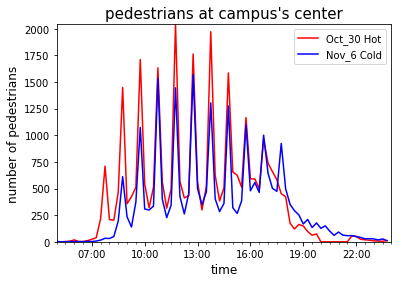

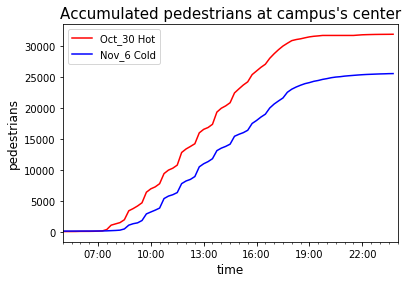

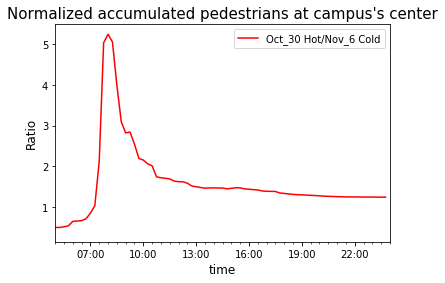

p = 0.2843955382414203


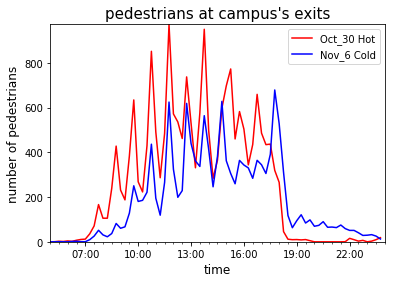

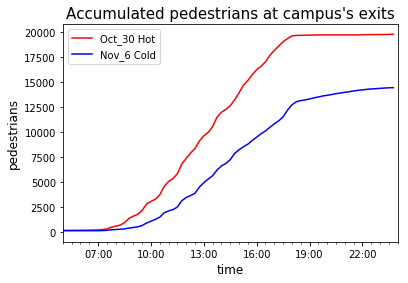

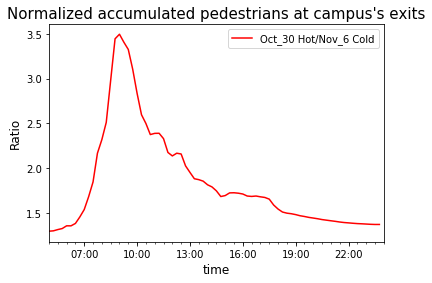

p = 0.08831899295375445


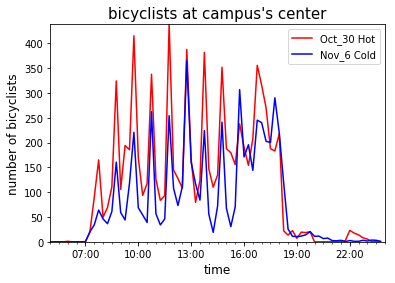

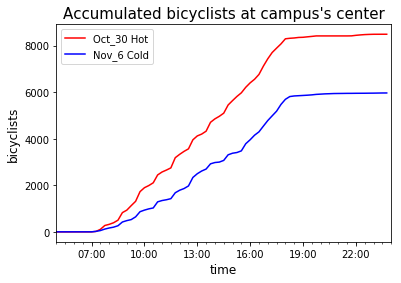

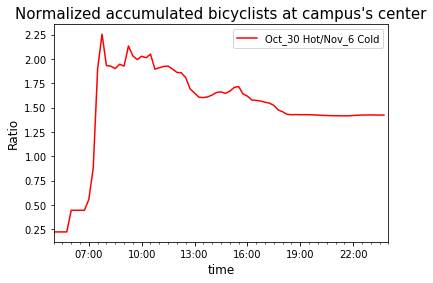

p = 0.08086438901681126


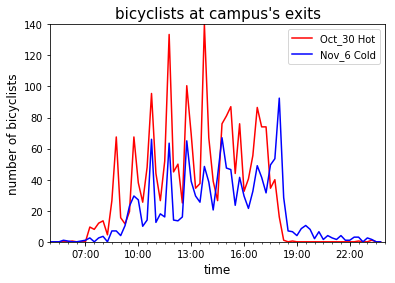

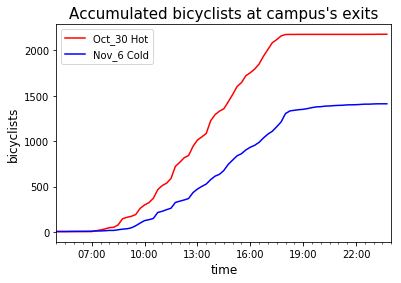

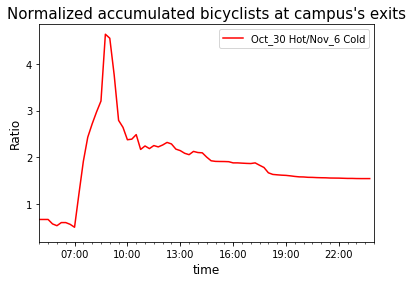

p = 0.043864945855070836


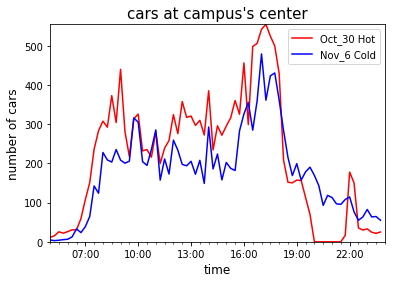

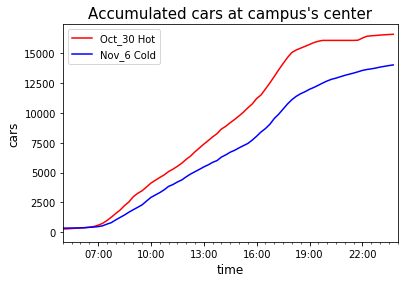

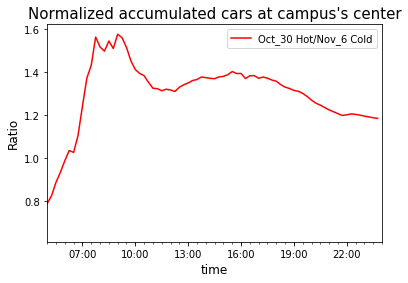

p = 0.19457592746640917


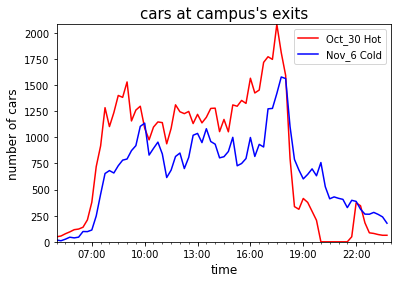

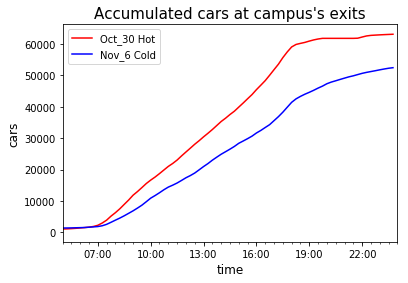

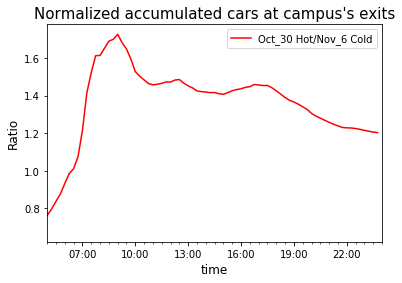

p = 0.14713938231587576


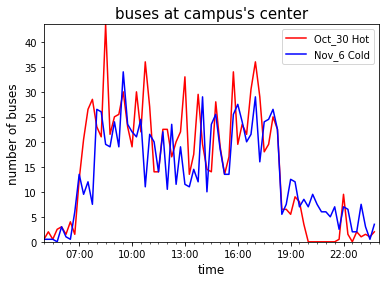

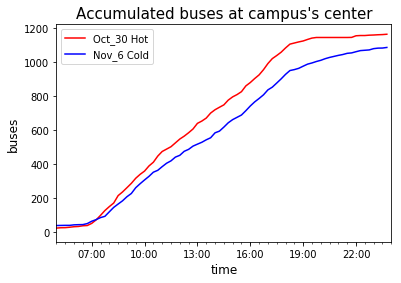

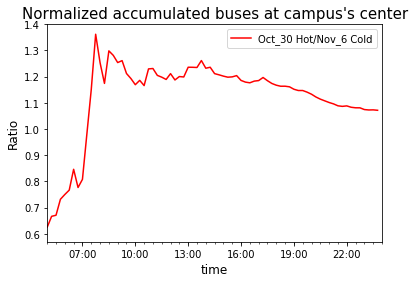

p = 0.5992753238681128


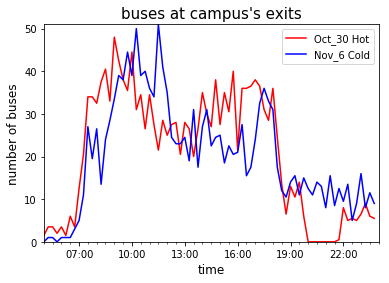

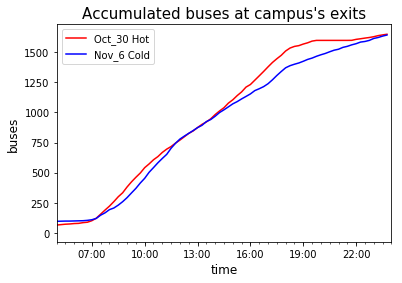

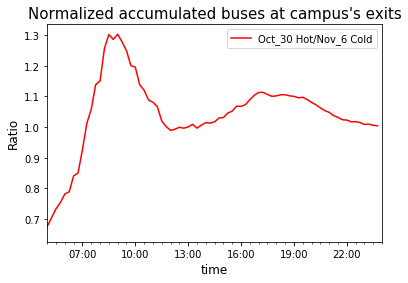

p = 0.9732169669949415


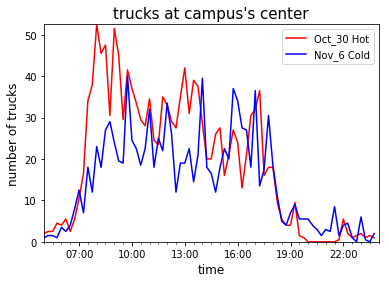

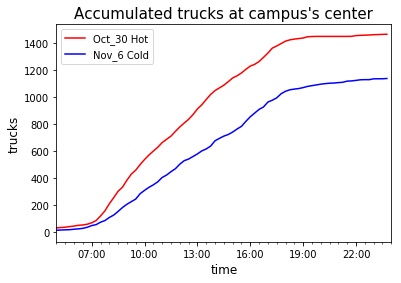

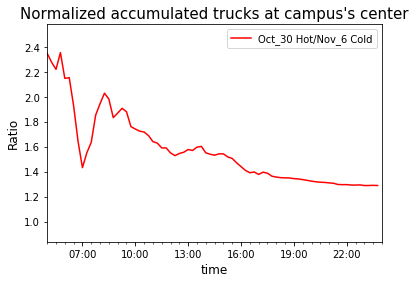

p = 0.0868026790066454


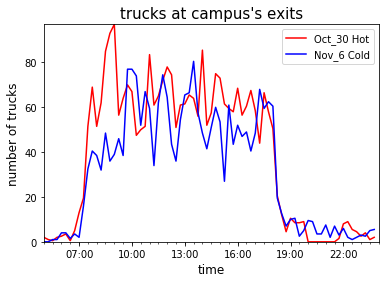

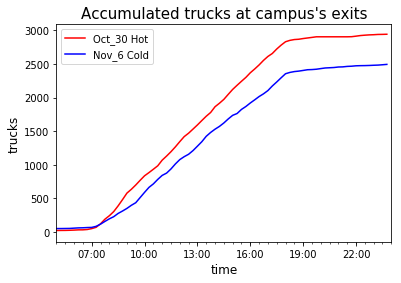

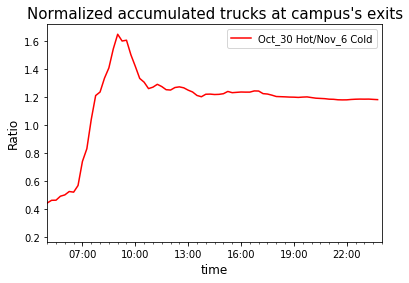

p = 0.2661732179472125


In [18]:
Dots_mod['in_campus']=Dots_mod['location_5'].apply(lambda x:x=='Stadium Drive & Regents Drive')
Dots_mod3=Dots_mod.drop(columns=['location_5'])
Dots_mod4=Dots_mod3.groupby(['time','in_campus','Date','StartTime'],as_index=False).sum()
data_Nov_6_4=Dots_mod4[Dots_mod4['Date']=='2019-11-06']
data_Oct_30_4=Dots_mod4[Dots_mod4['Date']=='2019-10-30']

#data_Nov_6_4['time']=data_Nov_6_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4['time']=data_Oct_30_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4=data_Oct_30_4.drop(columns=['StartTime'])
#data_Nov_6_4=data_Nov_6_4.drop(columns=['StartTime'])
#data_Oct_30_4=data_Oct_30_4.groupby(['time','in_campus','Date'],as_index=False).max()
#data_Nov_6_4=data_Nov_6_4.groupby(['time','in_campus','Date'],as_index=False).max()


for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for in_campus in [True, False]:
        if in_campus==True:
            loc="campus's center"
        else:
            loc="campus's exits"
        
        value1=data_Oct_30_4[data_Oct_30_4['in_campus']==in_campus]
        value2=data_Nov_6_4[data_Nov_6_4['in_campus']==in_campus]
        x=value1.time
        y1=value1[types]
        y1_acc=np.cumsum(y1.values)
        y2=value2[types]
        y2_acc=np.cumsum(y2.values)
        
        
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 Hot',color='r')
        ax.plot(x, y2, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('number of '+ types,fontsize =12)
        plt.title(types + ' at '+loc, color = "k",fontsize =15)
        plt.margins(0)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc, label='Oct_30 Hot',color='r')
        ax.plot(x, y2_acc, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel(types,fontsize =12)
        plt.title('Accumulated '+ types + ' at '+loc, color = "k",fontsize =15)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc/y2_acc, label='Oct_30 Hot/Nov_6 Cold',color='r')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =12)
        plt.ylabel('Ratio',fontsize =12)
        plt.title('Normalized accumulated '+ types + ' at '+loc, color = "k",fontsize =15)
        plt.show()
        
        #calculate p-value
        #print(x.values[5])
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))
        
        


### Predictive model at Baltimore Ave

NameError: name 'rounded_every_60' is not defined

## NN network

In [21]:
def temperature(a):
    if a.date()==datetime.date(2019,10,29):
        return 58.3
    elif a.date()==datetime.date(2019,10,30):
        return 57.1
    elif a.date()==datetime.date(2019,10,31):
        return 57.3
    elif a.date()==datetime.date(2019,11,1):
        return 43.9
    elif a.date()==datetime.date(2019,11,2):
        return 38.9
    elif a.date()==datetime.date(2019,11,3):
        return 40.0
    elif a.date()==datetime.date(2019,11,4):
        return 44.1
    elif a.date()==datetime.date(2019,11,5):
        return 45.9
    elif a.date()==datetime.date(2019,11,6):
        return 44.3
    elif a.date()==datetime.date(2019,11,7):
        return 49.7
    elif a.date()==datetime.date(2019,11,8):
        return 37.4
    elif a.date()==datetime.date(2019,11,9):
        return 32.6
    elif a.date()==datetime.date(2019,11,10):
        return 41.8
    elif a.date()==datetime.date(2019,11,11):
        return 50.2
    elif a.date()==datetime.date(2019,10,28):
        return 57.4


In [22]:
def class_peaks(a):
    #print (a.values[1])
    if (a[1] in [1,3,5]) &(a[0] in np.arange(7.75,18.75,1.0)):
        return 1
    elif (a[1] in [2,4])& (a[0] in np.arange(7.75,19,1.5)):
        return 1
    else:
        return -1
        
        

In [82]:
def fb_period(a): #a[0]=date, a[1]=time
    if a[0].date()==datetime.date(2019,11,2):
        if a[1]>=5 and a[1]<=21:
            return 1-(abs(a[1]-13))/8
        else:
            return 0
    else:
        return -1

0.4970906003706914


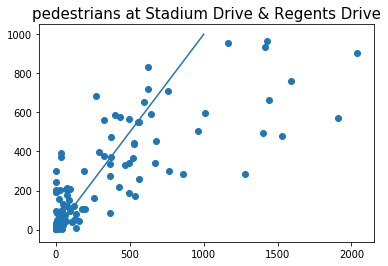

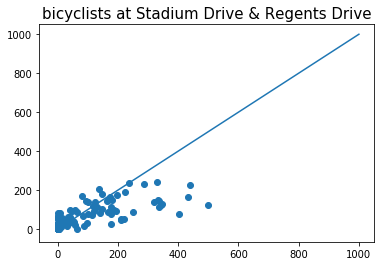

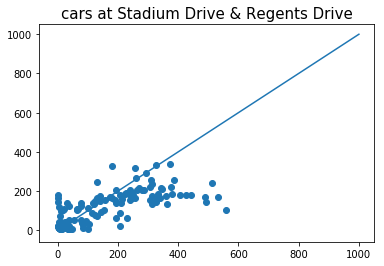

IndexError: list index out of range

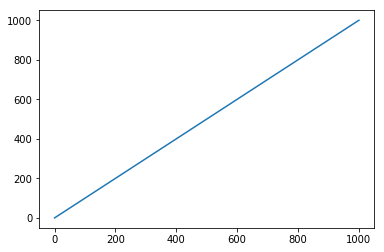

In [102]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold



Dots_mod['weekday']=Dots_mod['Date'].apply(lambda x: (x.weekday()+1))
Dots_mod['FB_start']=Dots_mod['Date'].apply(lambda x: 12 if x=='2019-11-02' else -1)
Dots_mod['FB_end']=Dots_mod['Date'].apply(lambda x: 15 if x=='2019-11-02' else -1)
Dots_mod['BK_start']=Dots_mod['Date'].apply(lambda x: 19.5 if x=='2019-11-01' or x=='2019-11-05' else (21 if x=='2019-11-9' else -1))
Dots_mod['BK_end']=Dots_mod['Date'].apply(lambda x: 22.5 if x=='2019-11-01' or x=='2019-11-05' else (24 if x=='2019-11-9' else -1))
Dots_mod['hour']=Dots_mod['StartTime'].apply(lambda x: (int(x.hour)+float(x.minute/60)))
Dots_mod['temp']=Dots_mod['Date'].apply(lambda x: temperature(x))
Dots_mod['is_weekend']=Dots_mod['weekday'].apply(lambda x: 1 if x==6 or x==7 else -1)
Dots_mod['is_gameday']=Dots_mod['Date'].apply(lambda x: 1 if x=='2019-11-02' else -1)
Dots_mod['class_peak']=Dots_mod[['hour','weekday']].apply(class_peaks,axis=1)
Dots_mod['FB_period']=Dots_mod[['Date','hour']].apply(fb_period,axis=1)




Dots_list=[]
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Stadium Drive & Regents Drive'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus_Dr_&_Presidential_Ave'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='University_Blvd_&_Paint_Branch_Dr'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Baltimore Avenue & Regents Drive (South Gate)'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus Drive & Paint Branch Drive'])
train_x=[]
train_y=[]
test_x=[]
test_y=[]
pred_y=[]
x_whole=[]
y_whole=[]
acc_list=[]

for i in range(5):
    df=Dots_list[i]
    x=df[["hour","weekday","FB_start","FB_end","BK_start","BK_end","temp",'is_weekend','is_gameday','class_peak','FB_period']]
    x_whole.append(x)
    y=df[['pedestrians','bicyclists','cars']]
    y_whole.append(y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1000)
    train_x.append(x_train)
    train_y.append(y_train)
    test_x.append(x_test)
    test_y.append(y_test)
    locs=['Stadium Drive & Regents Drive']
          #,'Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
          #       'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']
    types=['pedestrians','bicyclists','cars']
    xx= np.linspace(0, 1000, 1000)

for i in range(5):
    regressor = MLPRegressor(hidden_layer_sizes = (20, 50, 100,200, 400,800,1000,1000,800,400,200), 
                             activation = 'relu', solver = 'adam', random_state=100, alpha=0.0000001,max_iter=50000,tol=0.000001)
    regressor.fit(train_x[i], train_y[i])
    pred=regressor.predict(test_x[i])
    pred_y.append(pred)
    x=np.arange(len(pred))
    location=locs[i]
    y_true=test_y[i]
    acc=r2_score(y_true, pred)
    print (acc)
    acc_list.append(acc)
    for j in range(5):
        fig = plt.figure()
        ax = plt.subplot(111)
        plt.plot(xx,xx)
        plt.scatter(y_true[types[j]],pred[:,j])
        plt.title(types[j] + ' at '+ location, color = "k",fontsize =15)
        plt.show()


    
    


### Model 2

In [47]:
def rounded_time(df,time_dif):
    df_refined=df[['hour','Date','location_5',"temp",'pedestrians','bicyclists','cars','buses','trucks']]
    df_refined['idx']=df_refined['hour'].apply(lambda x: np.floor_divide(x,time_dif))
    df_refined=df_refined.drop(columns=["hour"])
    df_output=df_refined.groupby(['Date','location_5','idx',"temp"],as_index=False).mean()
    df_output['center_time']=df_output['idx'].apply(lambda x:x*time_dif+time_dif/2)
    
    return df_output

In [52]:
from sklearn import preprocessing

weekday_date=['2019-10-28','2019-10-29','2019-10-30','2019-10-31','2019-11-01','2019-11-04','2019-11-05',
              '2019-11-06','2019-11-07','2019-11-08']
weekend_date=["2019-11-03",'2019-11-09','2019-11-10']
week_date=weekday_date+weekend_date
df_reg1={}
df_reg2={}
df_reg3={}
for i in week_date:
    df_reg1[i]=Dots_mod[Dots_mod['Date']==i]
    weekday=pd.to_datetime(i).weekday()+1
    if weekday in [1,3,5,6,7]:
        timedif=1
    else:
         timedif=1.5
    df_reg2[i]=rounded_time(df_reg1[i],timedif)
    df_reg3[i]=df_reg2[i].copy()
    cols_to_norm = ['pedestrians','bicyclists','cars','buses','trucks']
    df_reg3[i][cols_to_norm]=df_reg3[i][cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#model for weekday:
for i in weekday_date:
    
    

    
    

D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
hot_date=['2019-10-28','2019-10-29','2019-10-30']
for i in hot_date:
    df_reg1[i]=Dots_mod[Dots_mod['Date']=i]
    

data_Nov_4_4=Dots_mod4[Dots_mod4['Date']=='2019-11-04']
data_Nov_4_4['time']=data_Nov_4_4['time'].apply(lambda x:rounded_every_60(x))
data_Nov_4_4=data_Nov_4_4.drop(columns=['StartTime'])
data_Nov_4_4=data_Nov_4_4.groupby(['time','in_campus','Date'],as_index=False).mean()
value_in=data_Nov_4_4[data_Nov_4_4['in_campus']==True]
value_in['acc_ped']=np.cumsum(value_in['pedestrians'])
value_in['acc_bike']=np.cumsum(value_in['bicyclists'])
value_in['acc_cars']=np.cumsum(value_in['cars'])
value_in=value_in.iloc[5:]
x=np.arange(value_in.shape[0])+1
cof_df=pd.DataFrame()
a=["acc_ped","acc_bike","acc_cars"]
b=["pedestrians","bicyclists","cars"]
for i in range(3):
    cof_df[b[i]]=np.polyfit(x,value_in[b[i]],9)
    fx=np.poly1d(cof_df[b[i]])
    y_pred=fx(x)
    #y_pred[1:]-=y_pred[:-1]
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, value_in[b[i]],label='real',color='r')
    ax.plot(x, y_pred, label='prediction',color='b')
    ax.legend()
    plt.show()